1. Country with most players: England


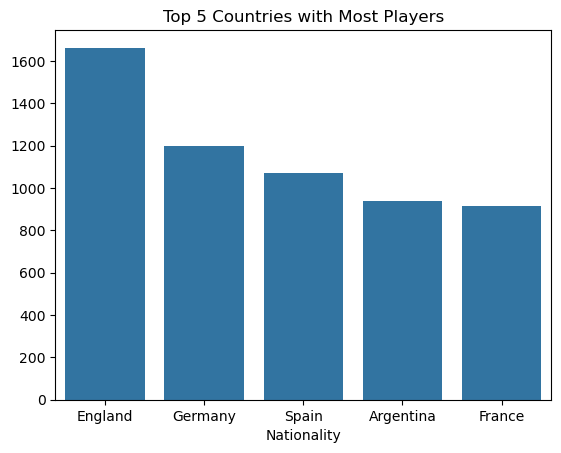

3. Highest salary player: L. Messi


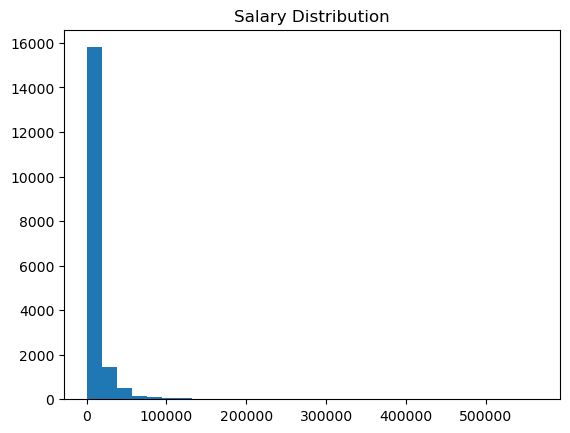

5. Tallest player: T. Holý 6'9
6. Club with most players: RC Celta
7. Most preferred foot: Right


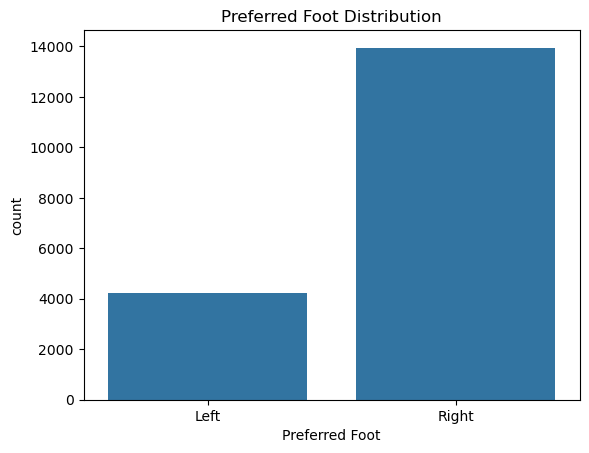

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fifa_data.csv')

# ---- Clean Wage ----
df['Wage_Numeric'] = (
    df['Wage']
    .str.replace('€', '', regex=False)
    .str.replace('K', '000', regex=False)
    .str.replace('M', '000000', regex=False)
    .astype(float)
)

# ---- Clean Height ----
def height_to_inches(h):
    try:
        f, i = h.split("'")
        return int(f) * 12 + int(i)
    except:
        return None

df['Height_Inches'] = df['Height'].apply(height_to_inches)

# 1. Country with most players
print("1. Country with most players:",
      df['Nationality'].value_counts().idxmax())

# 2. Top 5 countries bar chart
top5 = df['Nationality'].value_counts().head(5)
sns.barplot(x=top5.index, y=top5.values)
plt.title("Top 5 Countries with Most Players")
plt.show()

# 3. Highest salary player
hp = df.loc[df['Wage_Numeric'].idxmax()]
print("3. Highest salary player:", hp['Name'])

# 4. Salary histogram
plt.hist(df['Wage_Numeric'], bins=30)
plt.title("Salary Distribution")
plt.show()

# 5. Tallest player
tp = df.loc[df['Height_Inches'].idxmax()]
print("5. Tallest player:", tp['Name'], tp['Height'])

# 6. Club with most players
print("6. Club with most players:",
      df['Club'].value_counts().idxmax())

# 7. Preferred foot
print("7. Most preferred foot:",
      df['Preferred Foot'].value_counts().idxmax())

sns.countplot(x='Preferred Foot', data=df)
plt.title("Preferred Foot Distribution")
plt.show()